In [13]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("Weekly_counts_of_death_by_jurisdiction_and_cause_of_death.csv")

Drop columns not being used

In [5]:
df.drop(['Type','Week Ending Date', 'Time Period', 'Suppress',
         'Difference from 2015-2019 to 2020',
         'Percent Difference from 2015-2019 to 2020' ], axis=1, inplace=True)

Drop duplicate rows due to previous "Type" column

In [6]:
df.drop_duplicates(inplace=True)

Plot types of deaths by state per week

In [19]:
by_jurisdiction=df.groupby('Jurisdiction')

In [25]:
state_select=ipywidgets.SelectMultiple(options=df.Jurisdiction.unique(),
                               description="Jurisdiction")

In [36]:
display(state_select)

SelectMultiple(description='Jurisdiction', index=(20, 22, 28), options=('Alabama', 'Alaska', 'Arizona', 'Arkan…

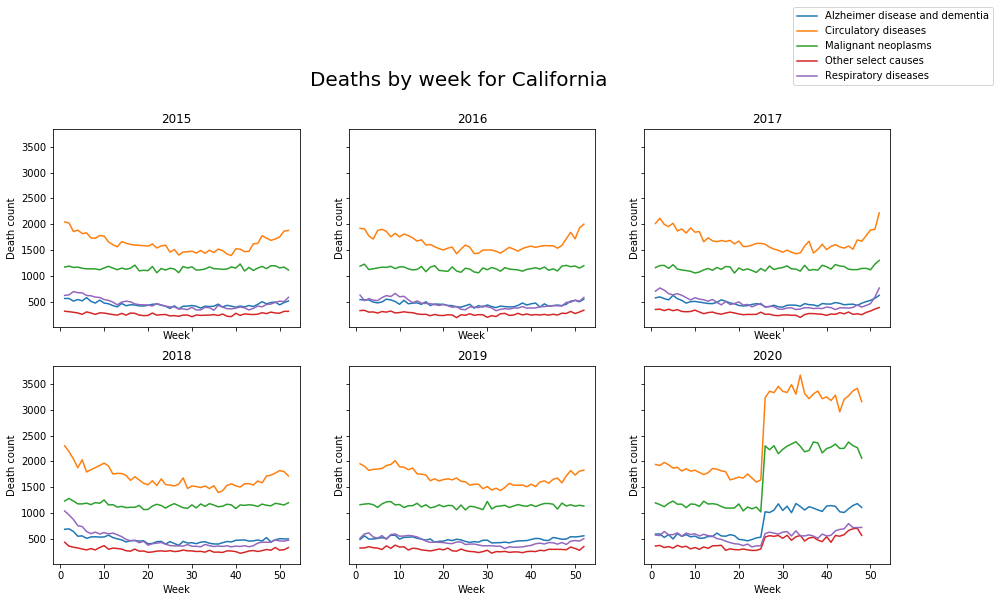

In [52]:
states=sorted(state_select.value)
if not len(states):
    print("Please select atleast one jurisdiction above..")
else:
    start=1
    for state,frame in by_jurisdiction:
        if state in states:
            fig,axs=plt.subplots(nrows=2,ncols=3, sharex=True, sharey=True, figsize=(15,8))
            fig.suptitle("Deaths by week for "+state, fontsize=20)
            x=frame.groupby(['Year','Week', 'Cause Group'], as_index=False)['Number of Deaths'].sum()
            years=x.Year.unique()
            for count, year in enumerate(years):
                i,j=count//3, count%3
                for cause in x['Cause Group'].unique():
                    temp_frame=x.loc[(x['Year']==year) & (x['Cause Group']==cause)]
                    axs[i][j].plot(temp_frame['Week'], temp_frame['Number of Deaths'], label=cause)
                axs[i][j].set_title(year)
                axs[i][j].set(xlabel="Week", ylabel="Death count")
            handles,labels=axs[1][2].get_legend_handles_labels()
            plt.legend(handles, labels, bbox_to_anchor=(1, 1.1),
                   bbox_transform=plt.gcf().transFigure)
            plt.show()
            start+=1
            if start<=len(states):
                input("Enter to see next jurisdiction")
        else:
            continue